In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [ ]:
# Load the Data
data = pd.read_csv('./Resources/tickets_2024_09.csv', low_memory=False)
data

,OBJECTID,TICKET_NUMBER,VIOLATION_TYPE_DESC,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,83487425,260566401,P,2024/09/05 04:00:00+00,657,54,ST.ELZBETH HOSPITAL SECURITY GUARDS,SEH,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2024/10/16 14:04:18+00
1,83487426,266969312,P,2024/09/18 04:00:00+00,133,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P055,NO PARKING ANYTIME,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2024/10/16 14:04:18+00
2,83487445,266974724,P,2024/09/01 04:00:00+00,1020,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P012,DISOBEYING OFFICIAL SIGN,...,0,0,0,0,397076.780,135370.390,38.886,-77.034,810050.0,2024/10/16 14:04:18+00
3,83487446,266974735,P,2024/09/08 04:00:00+00,1051,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,397328.708,135348.587,38.886,-77.031,805720.0,2024/10/16 14:04:18+00
4,83487447,266974746,P,2024/09/08 04:00:00+00,1108,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,397328.637,135237.646,38.885,-77.031,801948.0,2024/10/16 14:04:18+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98488,83587778,8271938231,P,2024/09/30 04:00:00+00,1535,15,DEPARTMENT OF PUBLIC WORKS,DPW,P012,DISOBEYING OFFICIAL SIGN,...,0,0,0,0,399383.850,135200.010,38.885,-77.007,812200.0,2024/10/16 14:04:59+00
98489,83587779,8271938242,P,2024/09/30 04:00:00+00,1638,15,DEPARTMENT OF PUBLIC WORKS,DPW,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,...,0,0,0,0,399995.838,135331.512,38.886,-77.000,803850.0,2024/10/16 14:04:59+00
98490,83587780,8271938253,P,2024/09/30 04:00:00+00,1639,15,DEPARTMENT OF PUBLIC WORKS,DPW,P170,FAILURE TO DISPLAY CURRENT TAGS,...,0,0,0,0,399995.838,135331.512,38.886,-77.000,803850.0,2024/10/16 14:04:59+00
98491,83587781,8271938264,P,2024/09/30 04:00:00+00,1640,15,DEPARTMENT OF PUBLIC WORKS,DPW,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,...,0,0,0,0,399995.838,135331.512,38.886,-77.000,803850.0,2024/10/16 14:04:59+00


In [ ]:
# Drop Irrelevant Columns
# Dropping columns 
irrelevant_columns = [
    'OBJECTID', 'TICKET_NUMBER', 'DISPOSITION_CODE', 'DISPOSITION_DESC',
    'DISPOSITION_DATE', 'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'GIS_LAST_MOD_DTTM'
]
data.drop(columns=irrelevant_columns, inplace=True, errors='ignore')
data

,VIOLATION_TYPE_DESC,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,...,MULTI_OWNER_NUMBER,DISPOSITION_TYPE,FINE_AMOUNT,TOTAL_PAID,PENALTY_1,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID
0,P,2024/09/05 04:00:00+00,657,54,ST.ELZBETH HOSPITAL SECURITY GUARDS,SEH,P170,FAILURE TO DISPLAY CURRENT TAGS,FRONT NEW HOSPITAL SE,,...,0,Other,100,0,100,NaN,NaN,NaN,NaN,NaN
1,P,2024/09/18 04:00:00+00,133,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P055,NO PARKING ANYTIME,ES D STREET SW,,...,0,Other,30,0,0,NaN,NaN,NaN,NaN,NaN
2,P,2024/09/01 04:00:00+00,1020,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P012,DISOBEYING OFFICIAL SIGN,BLK ES 300 RAOUL WALLENBERG PL SW,,...,0,Other,30,30,0,397076.780,135370.390,38.886,-77.034,810050.0
3,P,2024/09/08 04:00:00+00,1051,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,SS 1300 BLK C ST SW,,...,0,Dismissed,100,0,0,397328.708,135348.587,38.886,-77.031,805720.0
4,P,2024/09/08 04:00:00+00,1108,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,NS 1300 BLK D ST SW,,...,0,Dismissed,100,0,0,397328.637,135237.646,38.885,-77.031,801948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98488,P,2024/09/30 04:00:00+00,1535,15,DEPARTMENT OF PUBLIC WORKS,DPW,P012,DISOBEYING OFFICIAL SIGN,400 BLOCK NEW JERSEY AVE SE SOU*,,...,0,Other,30,0,0,399383.850,135200.010,38.885,-77.007,812200.0
98489,P,2024/09/30 04:00:00+00,1638,15,DEPARTMENT OF PUBLIC WORKS,DPW,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,400 BLOCK NORTH CAROLINA AVE SE*,,...,0,Other,100,0,0,399995.838,135331.512,38.886,-77.000,803850.0
98490,P,2024/09/30 04:00:00+00,1639,15,DEPARTMENT OF PUBLIC WORKS,DPW,P170,FAILURE TO DISPLAY CURRENT TAGS,400 BLOCK NORTH CAROLINA AVE SE*,,...,0,Other,100,0,0,399995.838,135331.512,38.886,-77.000,803850.0
98491,P,2024/09/30 04:00:00+00,1640,15,DEPARTMENT OF PUBLIC WORKS,DPW,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,400 BLOCK NORTH CAROLINA AVE SE*,,...,0,Other,100,0,0,399995.838,135331.512,38.886,-77.000,803850.0


In [4]:
#  Filter Data for Parking-Related Violations (`VIOLATION_TYPE_DESC == "P"`)
data = data[data['VIOLATION_TYPE_DESC'] == "P"]


In [5]:
# Ensure data is a copy if it was created as a subset
data = data.copy()

In [6]:
#  Combine Rare `VIOLATION_CODE` Types for "P"
# Define "rare" as codes with fewer than 100 occurrences
violation_code_counts = data['VIOLATION_CODE'].value_counts()
rare_codes = violation_code_counts[violation_code_counts < 100].index
data.loc[:, 'VIOLATION_CODE'] = data['VIOLATION_CODE'].apply(lambda x: 'OTHER' if x in rare_codes else x)


In [7]:
# Add Out-of-State Feature
# Assuming 'PLATE_STATE' column exists, replace 'YOUR_STATE' with the state you consider as "in-state"
data.loc[:, 'OUT_OF_STATE'] = data['PLATE_STATE'].apply(lambda x: 1 if x != 'YOUR_STATE' else 0)


In [8]:
# Create Binary Classification for `DISPOSITION_TYPE`
# Assign `1` for "Liable" and `0` for other dispositions
data.loc[:, 'DISPOSITION_BINARY'] = data['DISPOSITION_TYPE'].apply(lambda x: 1 if x == 'Liable' else 0)


In [9]:
# Select Features and Target
# Define `X` (features) and `y` (target variable)
X = data[['VIOLATION_CODE', 'FINE_AMOUNT', 'ISSUING_AGENCY_NAME', 'OUT_OF_STATE']]
y = data['DISPOSITION_BINARY']

In [10]:
# Step 7: Encode Categorical Variables
# Label encode `VIOLATION_CODE` and `ISSUING_AGENCY_NAME` columns using .loc to avoid warnings
label_encoder = LabelEncoder()
X.loc[:, 'VIOLATION_CODE'] = label_encoder.fit_transform(X['VIOLATION_CODE'])
X.loc[:, 'ISSUING_AGENCY_NAME'] = label_encoder.fit_transform(X['ISSUING_AGENCY_NAME'])


In [11]:
# Step 8: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize and Train the Classification Model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make Predictions on the Test Set
y_pred = classifier.predict(X_test)


In [14]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the Model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Model Accuracy: 0.9946970492491862

Confusion Matrix:
 [[18945     0]
 [  101     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     18945
           1       0.00      0.00      0.00       101

    accuracy                           0.99     19046
   macro avg       0.50      0.50      0.50     19046
weighted avg       0.99      0.99      0.99     19046



In [15]:
# Save the Model for Future Use
joblib.dump(classifier, 'focused_binary_disposition_model.pkl')


['focused_binary_disposition_model.pkl']

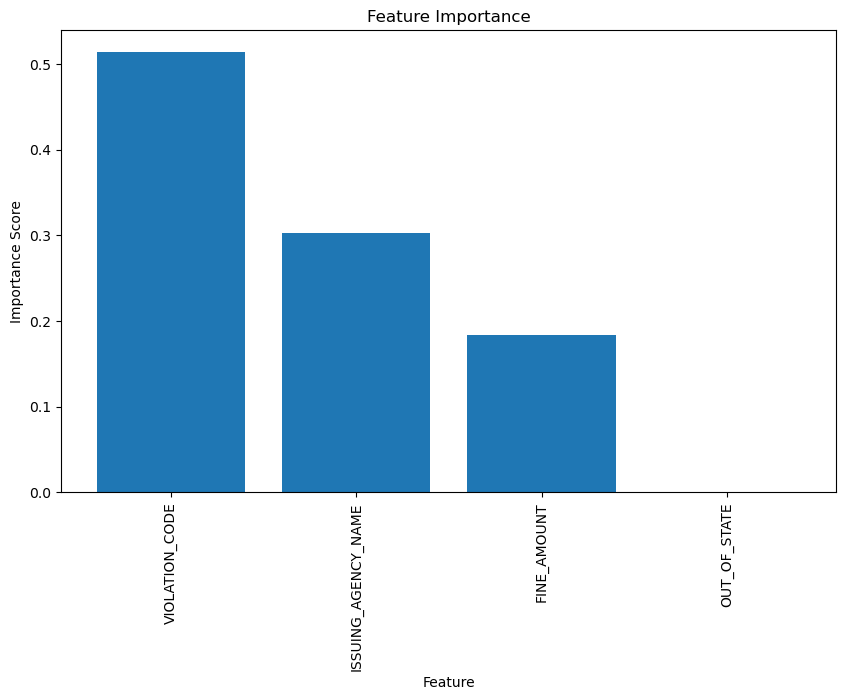

In [16]:
# Plotting Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()
